# Практическое задание к уроку 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [178]:
# Данные из урока
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [120]:
def calc_mse(y, y_pred):
  err = np.mean((y - y_pred)**2)
  return err

In [121]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
  return W

In [122]:
def calc_std_feat(x):
  res = (x - x.mean()) / x.std()
  return res

In [180]:
X_st = X.copy().astype(np.float64)
for i in range(1,X.shape[0]):
    X_st[i] = calc_std_feat(X[i])
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [125]:
W_array=[]
lambda_array=[]
for lambda_ in np.linspace(1e-2,1e-8,50):
    W_array.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_))
    lambda_array.append(lambda_)

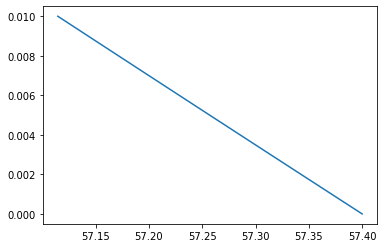

In [126]:
W=np.array(W_array)
plt.plot(W[:,0],lambda_array)


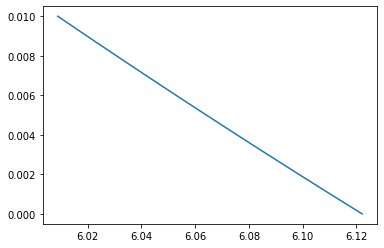

In [127]:
plt.plot(W[:,1],lambda_array)

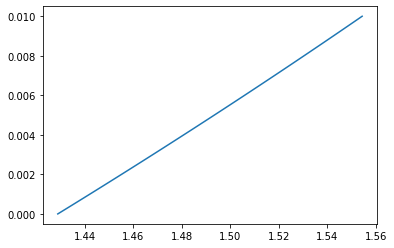

In [128]:
plt.plot(W[:,2],lambda_array)

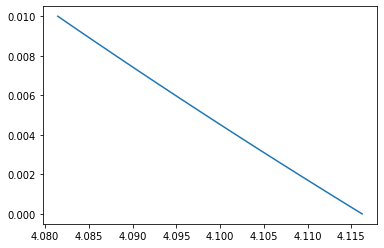

In [129]:
plt.plot(W[:,3],lambda_array)

### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

In [145]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

In [148]:
for i in range(1,X.shape[0]):
    X_norm[i] = (X[i] - X[i].min()) / (X[i].max() - X[i].min())
X_norm

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ],
       [0.1       , 0.1       , 0.2       , 0.1       , 0.3       ,
        0.        , 0.5       , 1.        , 0.1       , 0.2       ],
       [0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
        0.22580645, 0.67741935, 1.        , 0.        , 0.35483871],
       [0.        , 0.        , 0.5       , 0.        , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 0.5       ]])

In [150]:
X_st = X_norm.copy().astype(np.float64)
for i in range(1,X.shape[0]):
       X_st[i] = (X[i] - X1_mean) / X1_std
X_st

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01,  1.42857143e-01, -9.28571429e-01,
         8.57142857e-01,  2.64285714e+00, -5.71428571e-01,
        -2.14285714e-01],
       [ 1.77642857e+02,  2.49071429e+02,  2.66928571e+02,
         2.13357143e+02,  5.16928571e+02,  2.84785714e+02,
         5.34785714e+02,  7.13357143e+02,  1.59785714e+02,
         3.56214286e+02],
       [-5.71428571e-01, -5.71428571e-01, -2.14285714e-01,
        -5.71428571e-01, -2.14285714e-01, -5.71428571e-01,
         1.42857143e-01,  1.42857143e-01, -5.71428571e-01,
        -2.14285714e-01]])

Нормализовать полезно признаки, опирающиеся на величину значений - такие как расстояние. Стандартизировать полезно признаки для модели, которая опирается на распределение. Одновременно применить сразу и нормализацию, и стандартизацию нельзя.

### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [188]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
  np.random.seed(42)
  W = np.random.randn(X.shape[0])
  n = X.shape[1]
  for i in range(1, iterations+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n *2* np.dot((y_pred - y), X.T) + lambda_*np.sign(W)) 
  return W

In [189]:
W_array=[]
lambda_array=[]
for lambda_ in np.linspace(1e-2,1e-8,100):
    W_array.append(eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_))
    lambda_array.append(lambda_)

In [190]:
W=np.array(W_array)
W

array([[57.395     ,  6.12021356,  1.42747054,  4.11413934],
       [57.3950505 ,  6.12023376,  1.42748389,  4.11416059],
       [57.39510101,  6.12025395,  1.42749724,  4.11418184],
       [57.39515151,  6.12027414,  1.42751058,  4.11420309],
       [57.39520202,  6.12029434,  1.42752393,  4.11422434],
       [57.39525252,  6.12031453,  1.42753728,  4.11424558],
       [57.39530303,  6.12033473,  1.42755063,  4.11426683],
       [57.39535353,  6.12035492,  1.42756398,  4.11428808],
       [57.39540404,  6.12037511,  1.42757733,  4.11430933],
       [57.39545454,  6.12039531,  1.42759068,  4.11433058],
       [57.39550505,  6.1204155 ,  1.42760403,  4.11435183],
       [57.39555555,  6.1204357 ,  1.42761738,  4.11437308],
       [57.39560606,  6.12045589,  1.42763073,  4.11439432],
       [57.39565656,  6.12047608,  1.42764408,  4.11441557],
       [57.39570707,  6.12049628,  1.42765742,  4.11443682],
       [57.39575757,  6.12051647,  1.42767077,  4.11445807],
       [57.39580808,  6.

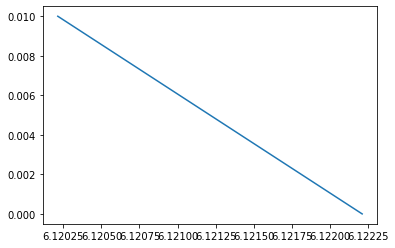

In [194]:
plt.plot(W[:,1],lambda_array)